In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Microsoft_Stock.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
df["Volume"]

0       36865322
1       37487476
2       39223692
3       28809375
4       24753438
          ...   
1506    34061853
1507    25479853
1508    25227455
1509    24792012
1510    43623471
Name: Volume, Length: 1511, dtype: int64

In [5]:
df.max(axis=0)

Date      9/9/2020 16:00:00
Open                 245.03
High                 246.13
Low                  242.92
Close                244.99
Volume            135227059
dtype: object

In [6]:
df.min(axis=0)

Date      1/10/2017 16:00:00
Open                   40.34
High                   40.74
Low                    39.72
Close                  40.29
Volume                101612
dtype: object

```
# Note: The volume ranges between 101612 to 135227059

```

In [7]:
ct=df.isnull().sum().sum()
print("Number of Null values: "+ str(ct))

Number of Null values: 0


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date']

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: Date, Length: 1511, dtype: datetime64[ns]

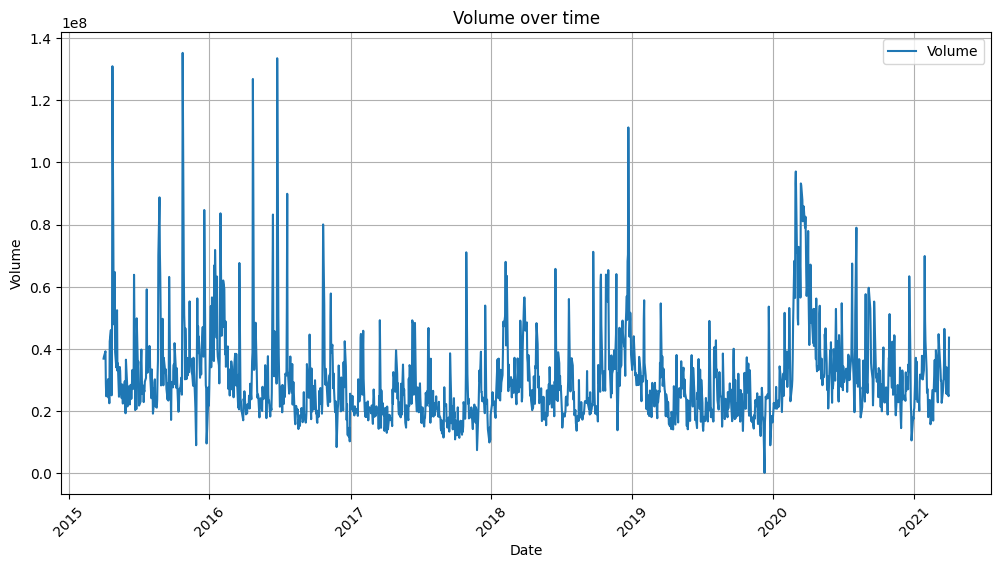

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Volume"], label="Volume")
plt.title("Volume over time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

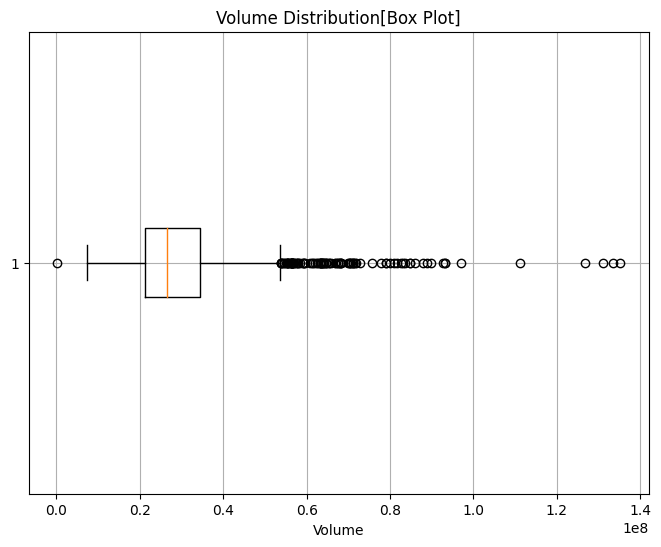

In [11]:
plt.figure(figsize=(8,6))
plt.boxplot(df["Volume"], vert=False)
plt.title("Volume Distribution[Box Plot]")
plt.xlabel("Volume")
plt.grid(True)
plt.show()

Text(0, 0.5, 'Frequency')

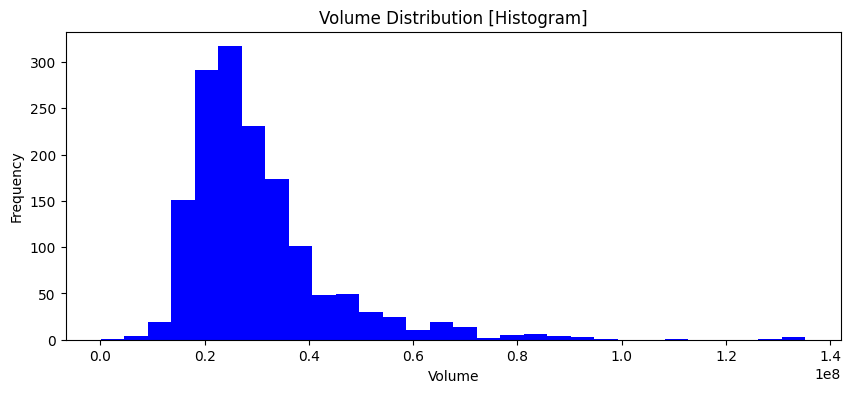

In [12]:
plt.figure(figsize=(10,4))
plt.hist(df["Volume"], bins = 30, color ='b')
plt.title('Volume Distribution [Histogram]')
plt.xlabel('Volume')
plt.ylabel('Frequency')

In [13]:
df.groupby(df['Date'].dt.date)['Volume'].sum()

Date
2015-04-01    36865322
2015-04-02    37487476
2015-04-06    39223692
2015-04-07    28809375
2015-04-08    24753438
                ...   
2021-03-25    34061853
2021-03-26    25479853
2021-03-29    25227455
2021-03-30    24792012
2021-03-31    43623471
Name: Volume, Length: 1511, dtype: int64

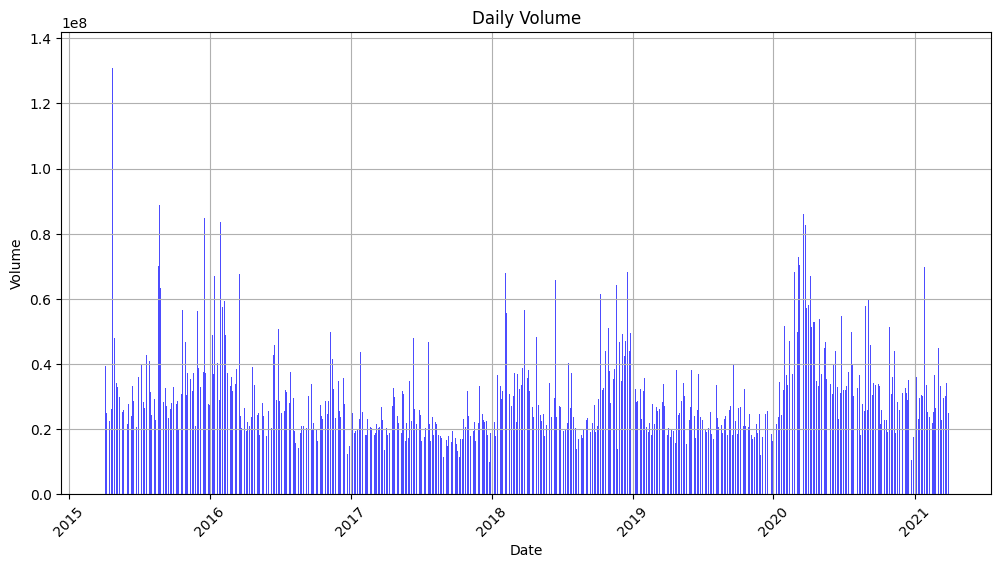

In [14]:
daily_volume = df.groupby(df['Date'].dt.date)['Volume'].sum()

plt.figure(figsize=(12, 6))
plt.bar(daily_volume.index, daily_volume, color='b', alpha=0.7)
plt.title('Daily Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

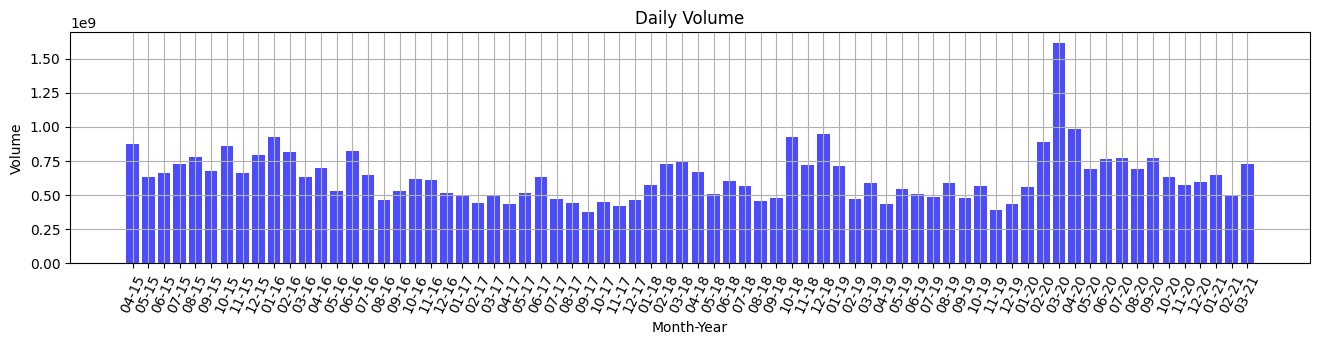

In [15]:
monthly_volume = df.set_index('Date')['Volume'].resample('M').sum()

plt.figure(figsize=(16, 3))
x = [date.strftime('%m-%y') for date in monthly_volume.index]
plt.bar(x, monthly_volume, color='b', alpha=0.7)
plt.title('Daily Volume')
plt.xlabel('Month-Year')
plt.ylabel('Volume')
plt.grid(True)
plt.xticks(rotation=65)
plt.show()

In [16]:
monthly_volume = df.set_index('Date')['Volume'].resample('M').sum()
print(monthly_volume)

Date
2015-04-30    874535095
2015-05-31    633072750
2015-06-30    664853340
2015-07-31    725458102
2015-08-31    776497465
                ...    
2020-11-30    573474483
2020-12-31    594571054
2021-01-31    647998091
2021-02-28    490981822
2021-03-31    724981506
Freq: M, Name: Volume, Length: 72, dtype: int64


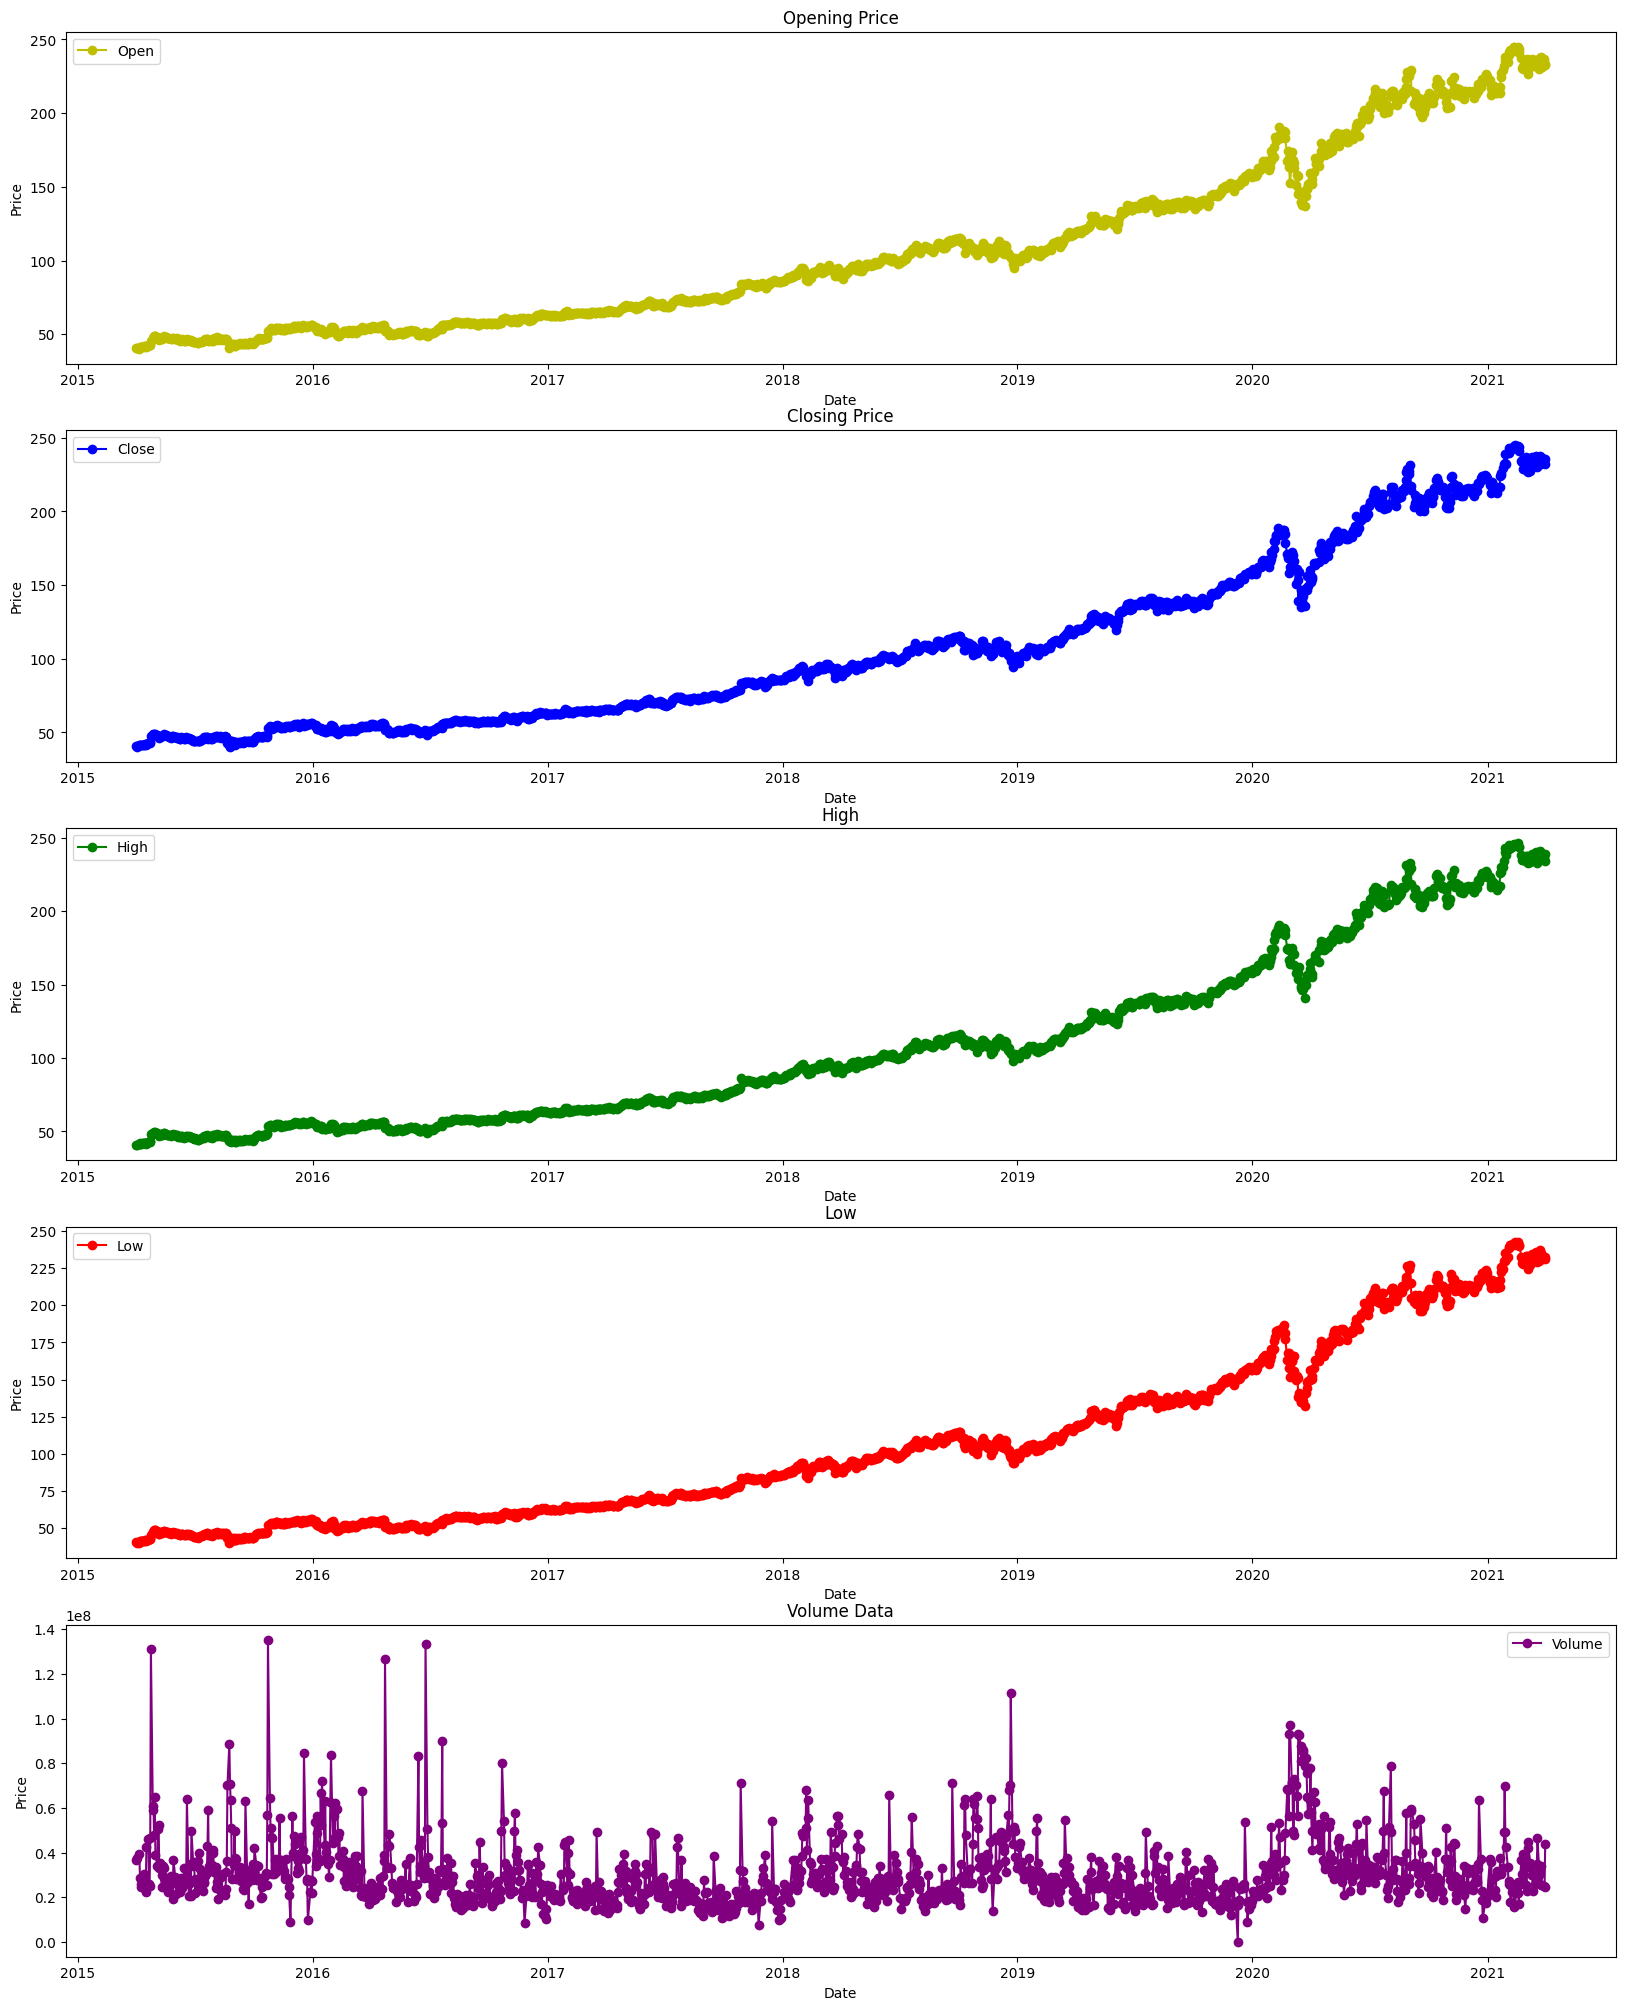

In [17]:
fig, axs = plt.subplots(5,1, figsize=(20,25))

axs[0].plot(df['Date'], df['Open'], label='Open', marker='o', color='y')
axs[0].set_title('Opening Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(df['Date'], df['Close'], label='Close', marker='o', color='b')
axs[1].set_title('Closing Price')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

axs[2].plot(df['Date'], df['High'], label='High', marker='o', color='g')
axs[2].set_title('High')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')
axs[2].legend()

axs[3].plot(df['Date'], df['Low'], label='Low', marker='o', color='r')
axs[3].set_title('Low')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Price')
axs[3].legend()

axs[4].plot(df['Date'], df['Volume'], label='Volume', marker='o', color='purple')
axs[4].set_title("Volume Data")
axs[4].set_xlabel('Date')
axs[4].set_ylabel('Price')
axs[4].legend()

Differentiating thrice, to find out the Jerk, rate of change of volume

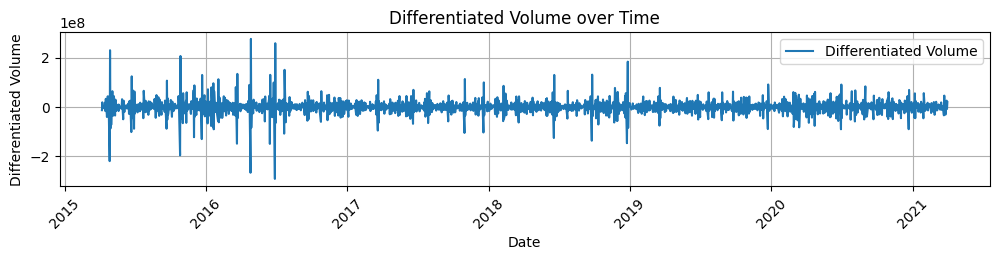

In [18]:
for i in range(3):
    df['Volume'] = df['Volume'].diff()
# Plot the differentiated data
plt.figure(figsize=(12, 2))
plt.plot(df['Date'], df['Volume'], label="Differentiated Volume")
plt.title("Differentiated Volume over Time")
plt.xlabel("Date")
plt.ylabel("Differentiated Volume")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()

                   Date   Open   High    Low  Close       Volume
268 2016-04-25 16:00:00  51.78  52.13  51.63  52.11 -266743751.0
269 2016-04-26 16:00:00  52.26  52.35  51.09  51.44  275444969.0
312 2016-06-27 16:00:00  49.10  49.15  48.04  48.43 -291662605.0
313 2016-06-28 16:00:00  48.92  49.47  48.67  49.44  257890683.0


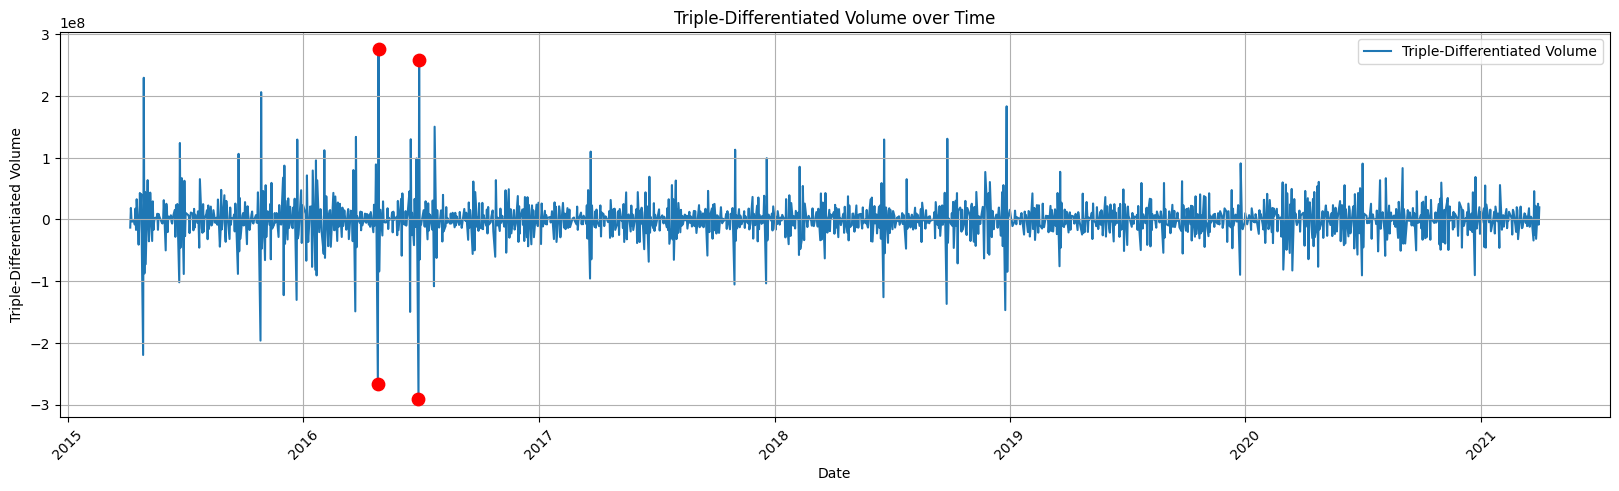

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'df' DataFrame with the triple-differentiated data
threshold = df['Volume'].quantile(0.999)

# Create a plot for the third derivative
plt.figure(figsize=(20, 5))
plt.plot(df['Date'], df['Volume'], label="Triple-Differentiated Volume", zorder=1)
plt.title("Triple-Differentiated Volume over Time")
plt.xlabel("Date")
plt.ylabel("Triple-Differentiated Volume")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Identify and annotate potential anomalies based on the threshold
anomalies = df[df['Volume'].abs() > threshold]
print(anomalies)
plt.scatter(anomalies['Date'], anomalies['Volume'], color='red', s=80, zorder=2)
plt.show()

                    Date    Open   High    Low  Close      Volume
1234 2020-02-26 16:00:00 -108.60 -42.37 -91.21 -12.36   8500076.0
1235 2020-02-27 16:00:00  107.97  33.88  66.28 -12.34  59922281.0
1379 2020-09-22 16:00:00   91.29  31.22  -0.65 -14.01  45662815.0


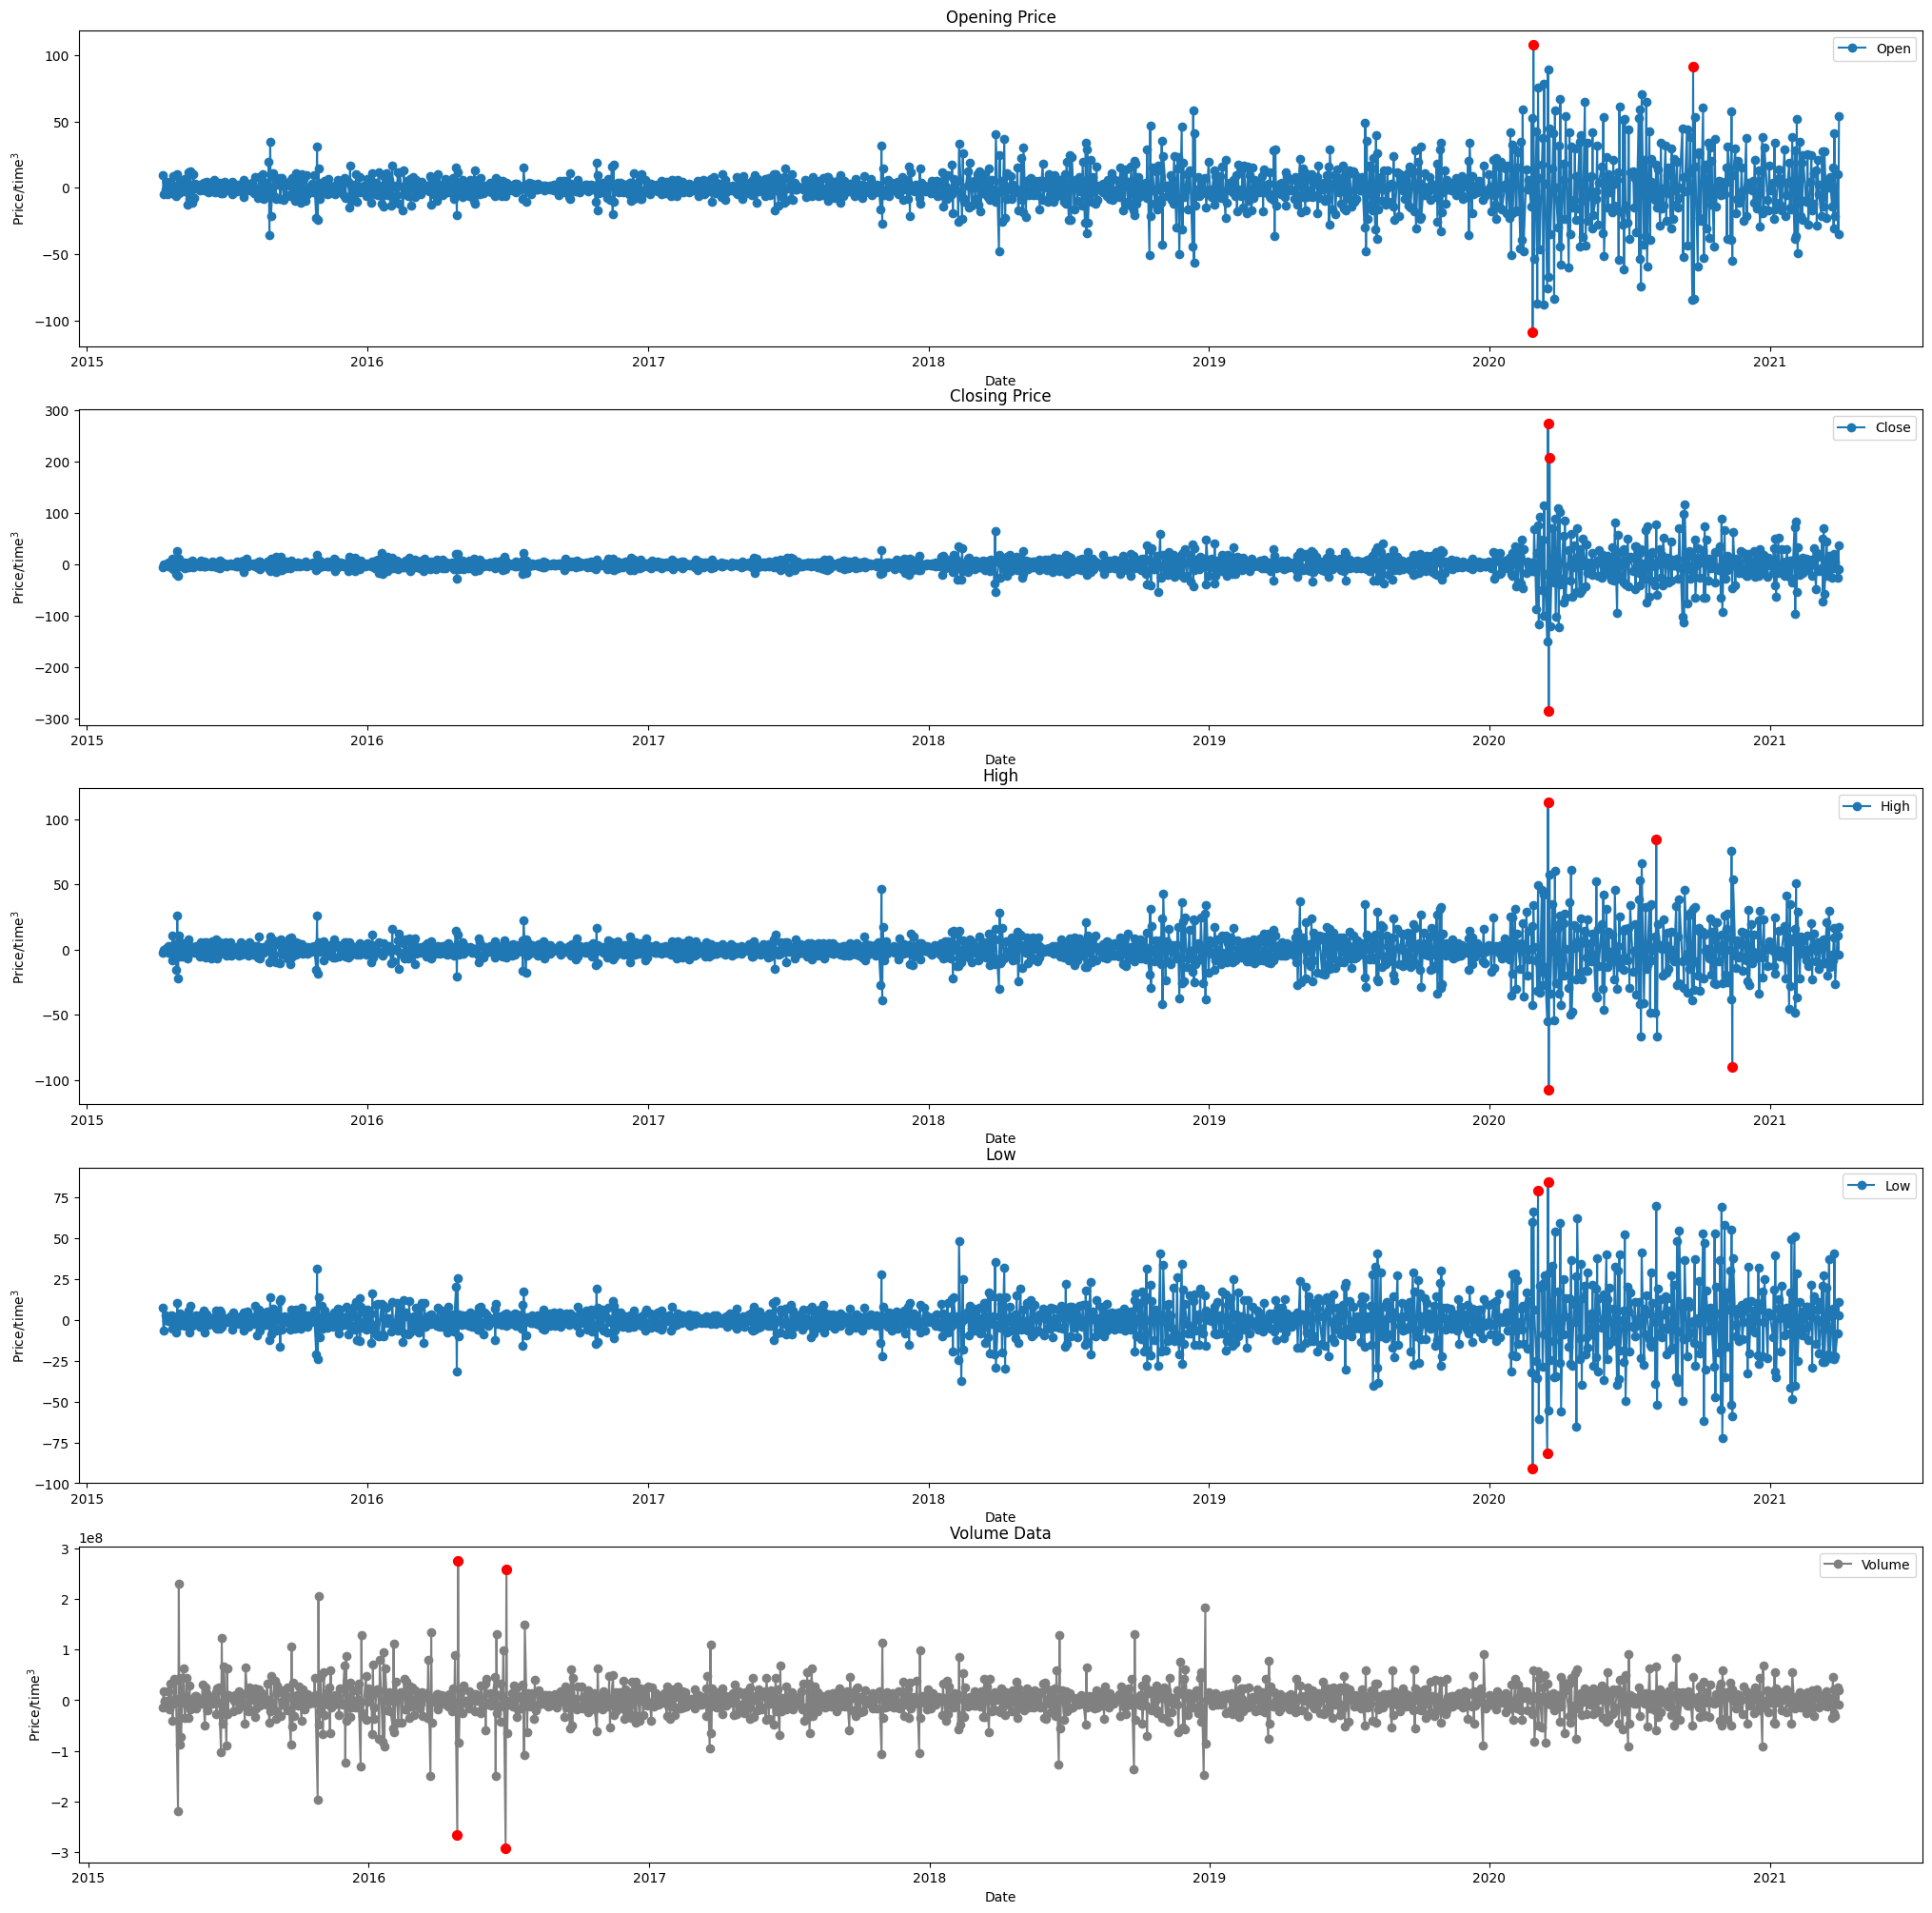

In [20]:
for i in range(3):
  df['Open'] = df['Open'].diff()
  df['Close'] = df['Close'].diff()
  df['High'] = df['High'].diff()
  df['Low'] = df['Low'].diff()

fig, axs = plt.subplots(5,1, figsize=(25,25))
threshold = df['Open'].quantile(0.999)

anomalies = df[df['Open'].abs() > threshold]
print(anomalies)
axs[0].plot(df['Date'], df['Open'], label='Open', marker='o', zorder=1)
axs[0].set_title('Opening Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel(r'Price/time$^3$')
axs[0].legend()
axs[0].scatter(anomalies['Date'], anomalies['Open'], color='red', marker='o', s=50, zorder=2)

threshold = df['Close'].quantile(0.999)
anomalies = df[df['Close'].abs() > threshold]
axs[1].plot(df['Date'], df['Close'], label='Close', marker='o', zorder=1)
axs[1].set_title('Closing Price')
axs[1].set_xlabel('Date')
axs[1].set_ylabel(r'Price/time$^3$')
axs[1].legend()
axs[1].scatter(anomalies['Date'], anomalies['Close'], color='red', marker='o', s=50, zorder=2)

threshold = df['High'].quantile(0.999)
anomalies = df[df['High'].abs() > threshold]
axs[2].plot(df['Date'], df['High'], label='High', marker='o', zorder=1)
axs[2].set_title('High')
axs[2].set_xlabel('Date')
axs[2].set_ylabel(r'Price/time$^3$')
axs[2].legend()
axs[2].scatter(anomalies['Date'], anomalies['High'], color='red', marker='o', s=50, zorder=2)

threshold = df['Low'].quantile(0.999)
anomalies = df[df['Low'].abs() > threshold]
axs[3].plot(df['Date'], df['Low'], label='Low', marker='o', zorder=1)
axs[3].set_title('Low')
axs[3].set_xlabel('Date')
axs[3].set_ylabel(r'Price/time$^3$')
axs[3].legend()
axs[3].scatter(anomalies['Date'], anomalies['Low'], color='red', marker='o', s=50, zorder=2)

threshold = df['Volume'].quantile(0.999)
anomalies = df[df['Volume'].abs() > threshold]
axs[4].plot(df['Date'], df['Volume'], label='Volume', marker='o', color='gray', zorder=1)
axs[4].set_title("Volume Data")
axs[4].set_xlabel('Date')
axs[4].set_ylabel(r'Price/time$^3$')
axs[4].legend()


# Create a scatter plot for anomalies in the Volume data
axs[4].scatter(anomalies['Date'], anomalies['Volume'], color='red', marker='o', edgecolor='red', s=50, zorder=2)
plt.show()


In [21]:
ct=df.isnull().sum().sum()
print("Number of Null values: "+ str(ct))

Number of Null values: 23


In [22]:
df[df.isnull().any(axis=1)] #isna()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,NaN,NaN,NaN,NaN,NaN
1,2015-04-02 16:00:00,NaN,NaN,NaN,NaN,NaN
2,2015-04-06 16:00:00,NaN,NaN,NaN,NaN,NaN
3,2015-04-07 16:00:00,NaN,NaN,NaN,NaN,-13264595.0
4,2015-04-08 16:00:00,NaN,NaN,NaN,NaN,18508913.0


 Technical Statistics: Z-Score or IQR (Interquartile Range)

**Resources**:

Dataset - Microsoft Stock- Time Series Analysis:  
https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

Other methods:

1. **Z-Score or Standard Score** : for daily or intraday returns (percentage changes in price). Identify data points with Z-scores beyond a certain threshold as anomalies.
Extreme Z-scores can indicate abnormal price movements.
Moving Averages:

2. **Moving average** techniques to smooth the price data.
Identify anomalies as data points significantly deviating from the moving average.Moving averages help capture trends and filter out noise.

3. **Bollinger Bands**, which are based on moving averages and standard deviations.
Price points outside the bands may be considered anomalies.
Bollinger Bands help identify price volatility.
Volatility-Based Approaches:

4. **Historical or implied volatility**.
Anomalies can be associated with significant changes in volatility.

5. **Change-point detection algorithms**.
Algorithms like the **CUSUM or the Bayesian** change-point analysis can identify structural changes.

6. **Time Series Decomposition**:Decompose the stock price time series into trend, seasonality, and remainder components.
Analyze the remainder component for anomalies.

7. **Relative Metrics**: Relative to a **benchmark or market index**.
Anomalies are often relative to a reference point, such as sector performance.

8. **ML models**: Train machine learning models like **Isolation Forest, One-Class SVM, or autoencoders** on historical stock price data.
These models can identify patterns and anomalies in new data.

9. **LSTM Autoencoders**: Implement Long Short-Term Memory (LSTM) autoencoders for sequential data. Anomalies are detected as data points with high reconstruction errors.

10. **Unusual Trading Volume**: Examine trading volume data alongside price data.
Abnormally high or low trading volumes can indicate anomalies.

11. **Market Sentiment Analysis**: Analyze market sentiment data, such as news sentiment or social media sentiment, to identify events that may impact stock prices.

12. **High-Frequency Trading Signals**: Implement algorithms that detect anomalies based on high-frequency trading signals, such as order flow imbalance or price impact.

23. **Statistical Process Control:** Apply control chart techniques from quality control to monitor stock price behavior. Outliers in the control chart can be considered anomalies.

24. **Event-Driven Anomaly Detection**: Monitor stock prices for specific events, such as earnings announcements or economic releases, which can lead to abnormal price movements.